### Loading the required packages

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the Q1 sample CRASH dataset for further analysis of features.

Data is available for each quarter(2016 Q1,Q2,Q3,Q4) as excel files. Out of the many excel sheets the main in with Crash information.

This analysis is only around CRASH information and not using addtional information like Personal invloved, Weather, Vehicle type at this time. but a more detailed analysis witll cover other type of information as well.


In [2]:
# sheetname = ["CRASH", "PERSON", "VEHICLE", "EMS", "CIRCUM_PERSON", "CIRCUM_VEHICLE", "CIRCUM_ROAD", "CIRCUM_WEATHER"]
dateparse = lambda x: pd.datetime.strptime(x, '%m-%d-%Y %H:%M:%S')


def getData(filePath):
    crash = pd.read_excel(filePath, parse_dates={'datetime': ['ACC_DATE', 'ACC_TIME']},date_parser=dateparse,sheet_name = "CRASH",na_values=['?', -99999])
    return crash
    

data_Q1_CRASH = getData("./data/CrashData/Crash_Qtr01_2016.xlsx")
data_Q2_CRASH = getData("./data/CrashData/Crash_Qtr02_2016.xlsx")
data_Q3_CRASH = getData("./data/CrashData/Crash_Qtr03_2016.xlsx")

### TBD: some issue found with loading this file. Will need to add this data file after make some fixes.
#data_Q4_CRASH = getData("./data/CrashData/Crash_Qtr04_2016.xlsx")

# Bringing in all the data to on common data file.
df = [data_Q1_CRASH, data_Q2_CRASH, data_Q3_CRASH]
data = pd.concat(df)

# make the time of accident as the index on the datatframe for time series analysis..
data.index = pd.to_datetime(data.datetime)

### Some plots below to understand the data

First think first!!! Understand the data. In this problem we need to predict number of accidents daily/weekly/monthly for a given road segment or block then we will be able to better use these forecast for emergency services planning.

Some of data analysis will be to understand the important features.

Text(0.5,1,u'Breakdown of Report Type for Accidents (2016 Q1-Q3)')

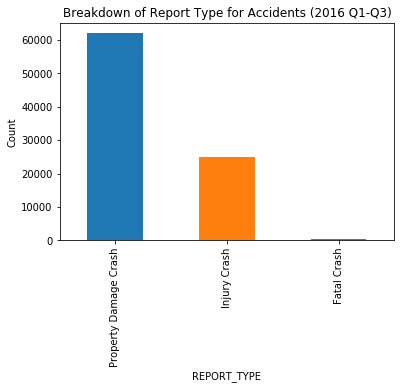

In [3]:
data["REPORT_TYPE"].value_counts().plot(kind='bar')
plt.xlabel("REPORT_TYPE")
plt.ylabel("Count")
plt.title("Breakdown of Report Type for Accidents (2016 Q1-Q3)")

##### Shows most of the accidents are related to property damage. 

Text(0.5,1,u'Breakdown of Accidents by County (2016 Q1-Q3)')

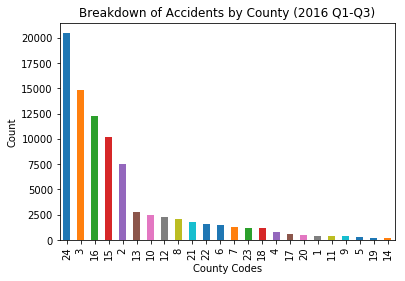

In [4]:
data["COUNTY_NO"].value_counts().plot(kind='bar')
plt.xlabel("County Codes")
plt.ylabel("Count")
plt.title("Breakdown of Accidents by County (2016 Q1-Q3)")

Looks from the above chart county infromation is one of the important factors of number of accidents in the county

Text(0.5,1,u'Breakdown of Accidents by Wether Code (2016 Q1-Q3)')

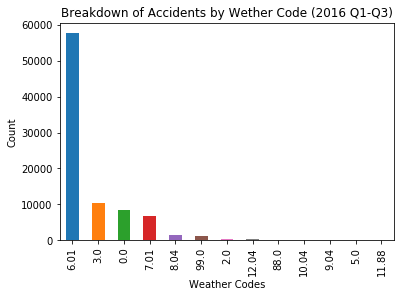

In [5]:
data["WEATHER_CODE"].value_counts().plot(kind='bar')
plt.xlabel("Weather Codes")
plt.ylabel("Count")
plt.title("Breakdown of Accidents by Wether Code (2016 Q1-Q3)")

Looks from the above weather is one of the important factors of number of accidents

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


Text(0.5,1,u'Month-Wise Accidents (2016 Q1-Q3)')

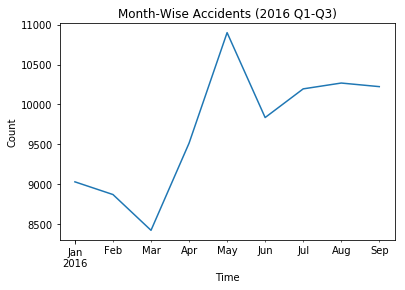

In [6]:
data["REPORT_TYPE"].resample('M', how='count').plot()
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Month-Wise Accidents (2016 Q1-Q3)")
# Count of number of accidents with time. 

Some months are bad for traffic

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


Text(0.5,1,u'Week-Wise Accidents (2016 Q1-Q3)')

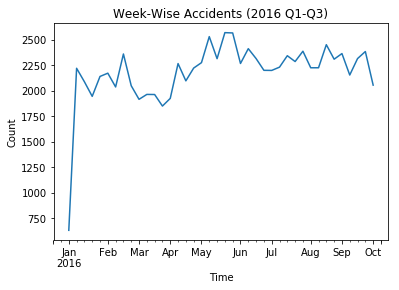

In [7]:
data["REPORT_TYPE"].resample('W', how='count').plot()
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Week-Wise Accidents (2016 Q1-Q3)")
# Count of number of accidents with time. 

Week of month is not a big factor and looks like not a variable factor

Text(0,0.5,u'Count')

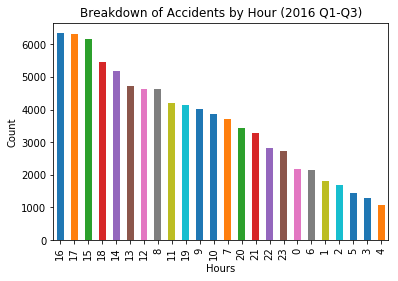

In [8]:
data['hour'] = data.index.hour
data["hour"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Hour (2016 Q1-Q3)")
plt.xlabel("Hours")
plt.ylabel("Count")

Hour of the day is another important factor for the number of accidents 
that happen in that hour. Looks like after office are more bad than morning hours


### Creating a Spatial plot of the data to under the spatial dispersion.

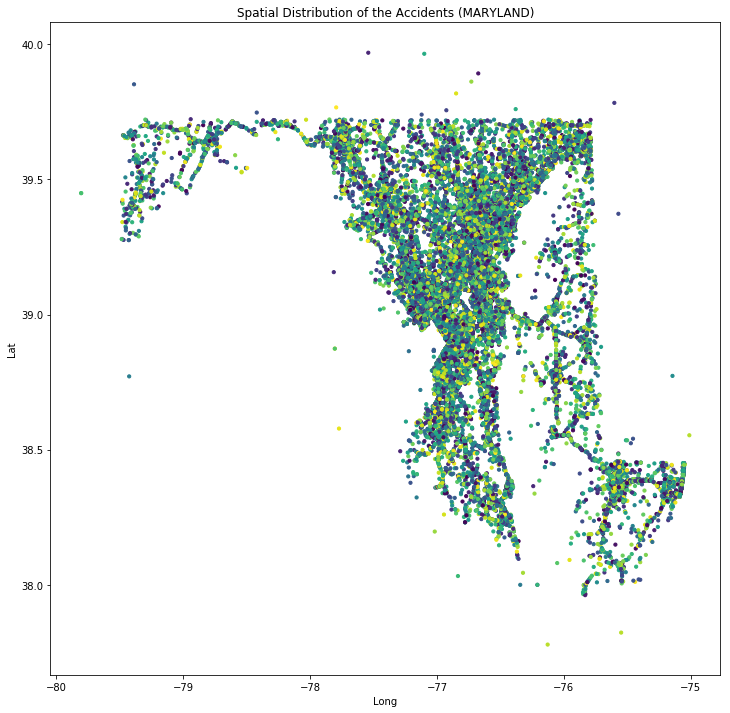

In [9]:
## Plot the accidents information from LatLong.
#temp = data_Q1_CRASH[data_Q1_CRASH["REPORT_TYPE"] != "Property Damage Crash"]
temp = data
colors = np.random.rand(temp.shape[0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 12), dpi=80)
plt.scatter(temp["LONGITUDE"],temp["LATITUDE"],c=colors,s=10)
plt.title("Spatial Distribution of the Accidents (MARYLAND)")
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()

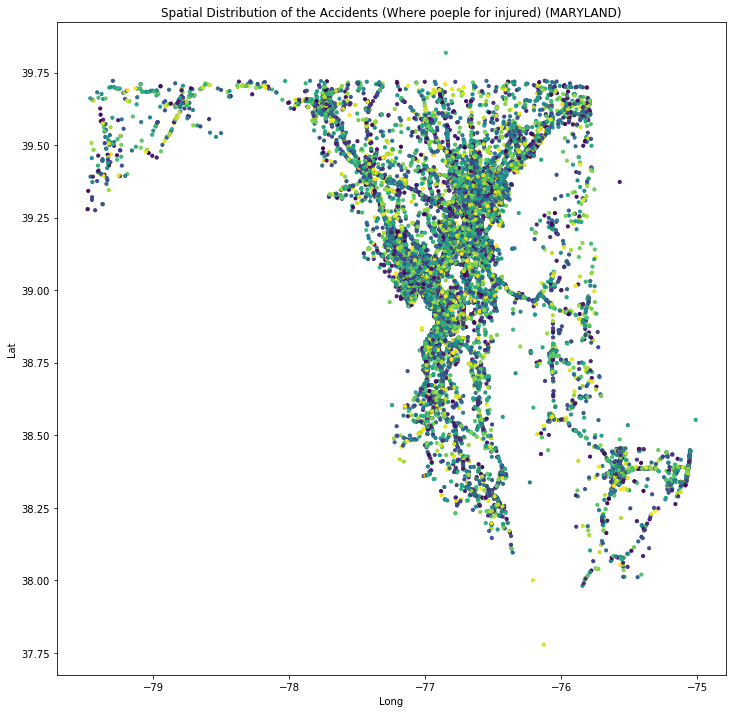

In [10]:
## Plot the accidents information from LatLong.
temp = data[data["REPORT_TYPE"] != "Property Damage Crash"]
#temp = data_Q1_CRASH
colors = np.random.rand(temp.shape[0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 12), dpi=80)
plt.scatter(temp["LONGITUDE"],temp["LATITUDE"],c=colors,s=10)
plt.title("Spatial Distribution of the Accidents (Where poeple for injured) (MARYLAND)")
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()

For the plot it looks like it as mostly spread around all the state...

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


Text(0.5,1,u'Month-Wise Accidents (2016 Q1-Q3)')

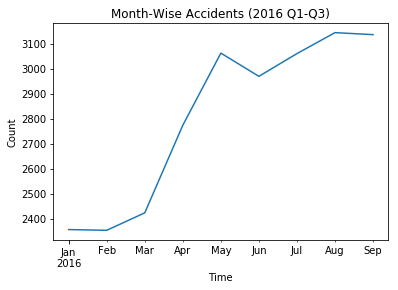

In [11]:
temp["REPORT_TYPE"].resample('M', how='count').plot()
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Month-Wise Accidents (2016 Q1-Q3)")
# Count of number of accidents with time. 

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


Text(0.5,1,u'Daily-Wise Accidents (2016 Q1-Q3)')

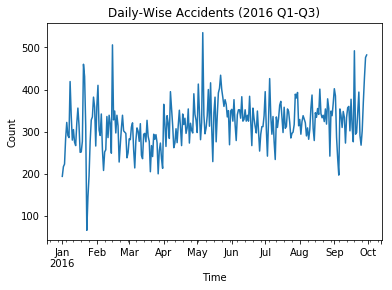

In [12]:
data["REPORT_TYPE"].resample('D', how='count').plot()
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Daily-Wise Accidents (2016 Q1-Q3)")
# Count of number of accidents with time. 

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0,0.5,u'Count')

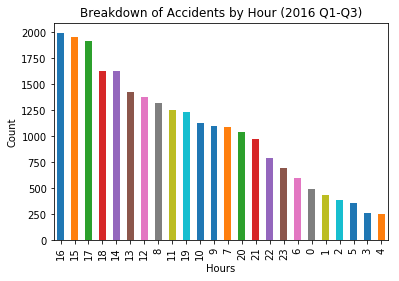

In [13]:
temp['hour'] = temp.index.hour
temp["hour"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Hour (2016 Q1-Q3)")
plt.xlabel("Hours")
plt.ylabel("Count")

Text(0,0.5,u'Count')

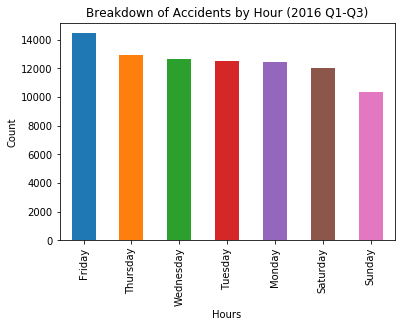

In [14]:
data['weekday'] = data.index.weekday_name
data["weekday"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Hour (2016 Q1-Q3)")
plt.xlabel("Hours")
plt.ylabel("Count")

### Creating Grid for mapping the accidents to spatial grid. 
The code below is used to generate a spatial grid. Accidents will be mapped to grids for a machine leanring based prediction at grid level.

/Users/212475040/anaconda/lib/python2.7/site-packages/geopandas/plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
/Users/212475040/anaconda/lib/python2.7/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


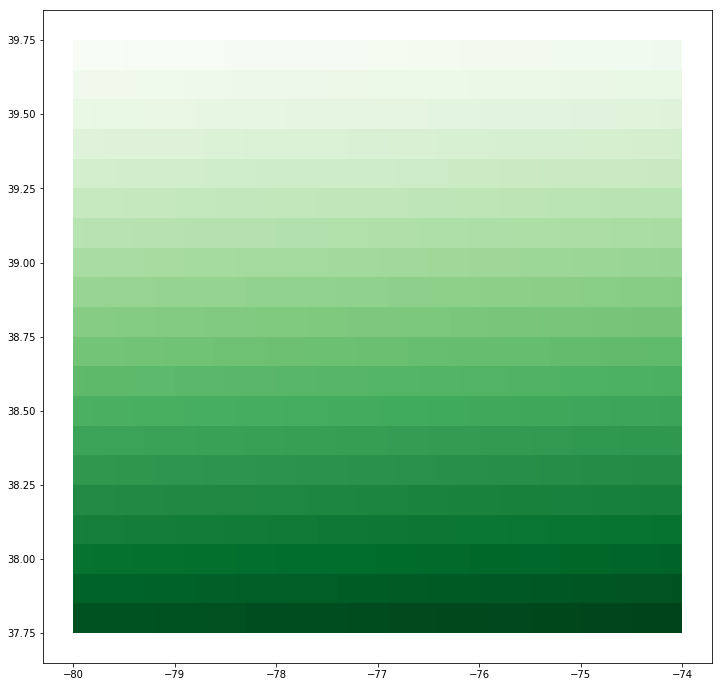

In [15]:
#### This code is not used as we are not mapping accidents to Grid Cells

import shapefile as shp
import math

minx,maxx,miny,maxy = -80,-74,37.75,39.75
dx = .1
dy = .1

nx = int(math.ceil(abs(maxx - minx)/dx))
ny = int(math.ceil(abs(maxy - miny)/dy))

w = shp.Writer(shp.POLYGON)
w.autoBalance = 1
w.field("ID")
id=0

for i in range(ny):
    for j in range(nx):
        id+=1
        vertices = []
        parts = []
        vertices.append([min(minx+dx*j,maxx),max(maxy-dy*i,miny)])
        vertices.append([min(minx+dx*(j+1),maxx),max(maxy-dy*i,miny)])
        vertices.append([min(minx+dx*(j+1),maxx),max(maxy-dy*(i+1),miny)])
        vertices.append([min(minx+dx*j,maxx),max(maxy-dy*(i+1),miny)])
        parts.append(vertices)
        w.poly(parts)
        w.record(id)

w.save('grid.shp')

import geopandas as gpd
shapefilepath = "./grid.shp"
gridsLayer = gpd.read_file(shapefilepath)
f, ax = plt.subplots(1, figsize=(12, 12))
ax = gridsLayer.plot(axes=ax,colormap='Greens')
plt.show()

### 

In [17]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(data.LONGITUDE, data.LATITUDE)]
crs = {'init': 'epsg:4326'}
accidents_data = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)

In [18]:
from geopandas.tools import sjoin
crash_WithRoadInfo = sjoin(accidents_data,roadnetworkwithbuffer, how="inner", op='intersects')

In [19]:
crash_WithRoadInfo.head

<bound method GeoDataFrame.head of                                datetime  LIGHT_CODE  COUNTY_NO  MUNI_CODE  \
2016-02-16 11:09:00 2016-02-16 11:09:00        1.00          1        0.0   
2016-01-11 08:14:00 2016-01-11 08:14:00        1.00          1        0.0   
2016-02-15 20:56:00 2016-02-15 20:56:00        3.00          1        0.0   
2016-03-23 07:33:00 2016-03-23 07:33:00        4.00          1        0.0   
2016-01-20 13:08:00 2016-01-20 13:08:00        1.00          1        0.0   
2016-03-06 22:38:00 2016-03-06 22:38:00        3.00          1        0.0   
2016-02-12 20:42:00 2016-02-12 20:42:00        4.00          1        0.0   
2016-02-04 08:40:00 2016-02-04 08:40:00        1.00          1        0.0   
2016-01-16 10:40:00 2016-01-16 10:40:00        1.00          1        0.0   
2016-06-05 13:51:00 2016-06-05 13:51:00        1.00          1        0.0   
2016-06-12 04:33:00 2016-06-12 04:33:00        4.00          1        0.0   
2016-04-07 13:31:00 2016-04-07 13:31:00  

In [20]:
print accidents_data.shape
print crash_WithRoadInfo.shape
print roadnetworkwithbuffer.shape

(87263, 39)
(87278, 41)
(1200, 2)


Text(0.5,1,u"Breakdown of Accidents by Road's")

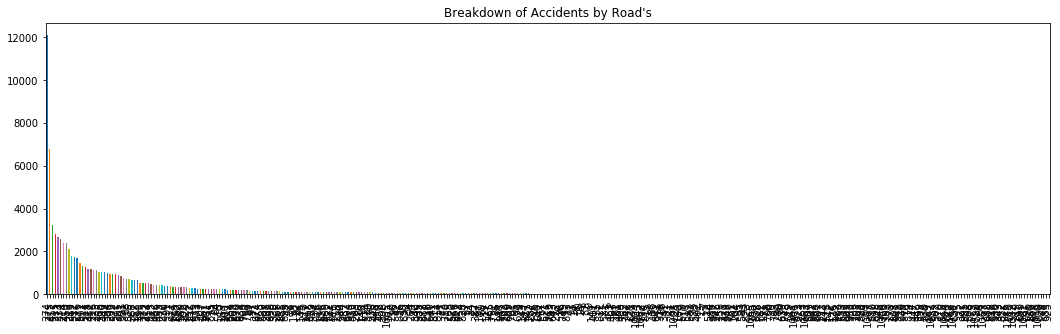

In [21]:
plt.figure(figsize=(18, 5), dpi=80)
crash_WithRoadInfo["ID"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Road's")

Text(0.5,1,u"Breakdown of Accidents by Road's")

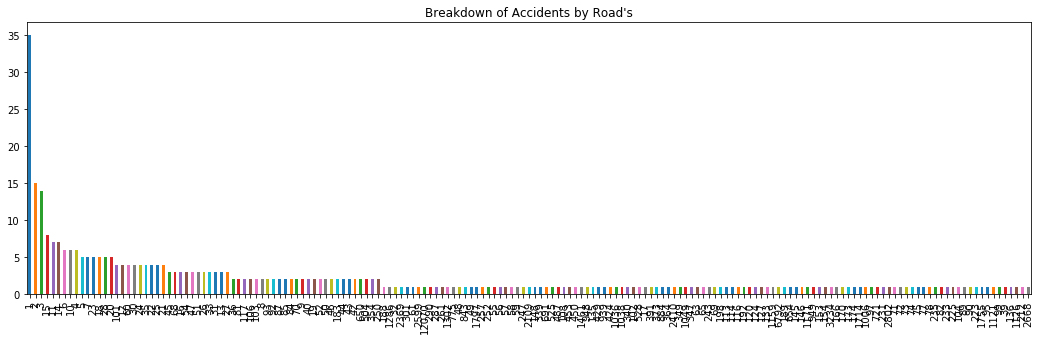

In [22]:
plt.figure(figsize=(18, 5), dpi=80)
crash_WithRoadInfo["ID"].value_counts().value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Road's")

In [23]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [24]:
#### Some basic code cleanup
crash_WithRoadInfo["LIGHT_CODE_Coded"] = coding(crash_WithRoadInfo["LIGHT_CODE"], 
                                                {0:"Not Applicable",
                                                 1:"Daylight",
                                                 3:"Dark Lights On",
                                                 4:"Dark No Lights",
                                                 5:"Dawn",
                                                 6:"Dusk",
                                                 7:"Dark - Unknown Lighting",
                                                 88:"Other",
                                                 99:"Unknown"})
crash_WithRoadInfo["SURF_COND_CODE"] = coding(crash_WithRoadInfo["SURF_COND_CODE"], 
                                                {0:"Not Applicable",
                                                 1:"Wet",
                                                 2:"Dry",
                                                 3:"Snow",
                                                 4:"Ice",
                                                 5:"Mud, Dirt, Gravel",
                                                 6:"Slush",
                                                 7:"Water (standing/moving)",
                                                 8:"Sand",
                                                 9:"Oil",
                                                 88:"Other",
                                                 99:"Unknown"})
crash_WithRoadInfo["RD_COND_CODE"] = coding(crash_WithRoadInfo["RD_COND_CODE"], 
                                                {0:"Not Applicable",
                                                 1:"No Defects",
                                                 2:"Shoulder Defect",
                                                 3:"Holes, Ruts, Etc.",
                                                 4:"Foreign Material",
                                                 5:"Loose Surface Material",
                                                 6:"Obstruction Not Lighted",
                                                 7:"Obstruction Not Signaled",
                                                 8:"View Obstructed",
                                                 88:"Other"})
crash_WithRoadInfo["WEATHER_CODE"] = coding(crash_WithRoadInfo["WEATHER_CODE"], 
                                                {0:"Not Applicable",
                                                 2:"Foggy",
                                                 3:"Raining",
                                                 5:"Severe Winds",
                                                 6.01:"Clear",
                                                 7.01:"Cloudy",
                                                 8.04:"Snow",
                                                 9.04:"Sleet",
                                                 10.04:"Blowing Snow",
                                                 11.88:"Blowing Sand, Soil, Dirt",
                                                 12.04:"Wintry Mix",
                                                 88:"Other",
                                                 99:"Unknown"})

In [25]:
featureSet = crash_WithRoadInfo[['datetime','LIGHT_CODE',
                'SURF_COND_CODE','RD_COND_CODE','WEATHER_CODE','DISTANCE','hour','weekday','ID','LIGHT_CODE_Coded']]
featureSet.to_csv("./featuresSet_nn.csv")

In [26]:
featureSet["hour"] = coding(featureSet["hour"],{1:"Night",
                                                 2:"Night",
                                                 3:"Night",
                                                 4:"Night",
                                                 5:"Night",
                                                 6:"Night",
                                                 7:"Morning",
                                                 8:"Morning",
                                                 9:"Morning",
                                                 10:"Morning",
                                                 11:"Afternoon",
                                                 12:"Afternoon",
                                                 13:"Afternoon",
                                                 14:"Afternoon",
                                                 15:"Afternoon",
                                                 16:"Evening",
                                                 17:"Evening",
                                                 18:"Evening",
                                                 19:"Evening",
                                                 20:"Evening",
                                                 21:"Evening",
                                                 22:"Night",
                                                 23:"Night",
                                                 0:"Night"})
featureSet["date"] = featureSet.datetime.dt.date

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
featureSet["month"] = featureSet.datetime.dt.month
featureSet_1 = featureSet.groupby(["ID","date","month","weekday","hour"]).size().to_frame(name = 'count').reset_index()
featureSet_2 = featureSet.groupby(["ID","date","month","weekday","hour"]).apply(lambda x:x["WEATHER_CODE"].value_counts().index[0]).to_frame(name = 'WEATHER_CODE').reset_index()
featureSet_1["date"] = featureSet_1["date"].astype('datetime64[ns]')
featureSet_3 = pd.merge(featureSet_1,featureSet_2,on=["ID","date","month","weekday","hour"], how='inner')
featureSet_3.to_csv("featureSet_3.csv",index=False)
featureSet_3["ID"] = featureSet_3["ID"].astype('Int32')

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Index([        u'datetime',       u'LIGHT_CODE',   u'SURF_COND_CODE',
           u'RD_COND_CODE',     u'WEATHER_CODE',         u'DISTANCE',
                   u'hour',          u'weekday',               u'ID',
       u'LIGHT_CODE_Coded',             u'date',            u'month'],
      dtype='object')

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import time

from sklearn import preprocessing
data_1 = pd.get_dummies(featureSet_3, columns=["weekday", "hour","WEATHER_CODE","month"])
print data_1.columns

 # Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results['mean_test_score'][candidate],
                    results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
    
    
    # Split Dataframe to Train/Test Split
msk = np.random.rand(len(data_1)) < 0.8
train = data_1[msk]
test = data_1[~msk]

rf = RandomForestRegressor()

    # use a full grid over all parameters
    
param_grid = {"n_estimators": [100,200,500,1000],
                  "max_features": [10,15,20,26,30],
                  "oob_score": [True]
                 }

    # run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid)
start = time.time()
grid_search.fit(train[["ID","month_1", 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
                "weekday_Friday","weekday_Monday","weekday_Saturday","weekday_Sunday","weekday_Thursday",
                "weekday_Tuesday","weekday_Wednesday",
                "hour_Afternoon","hour_Evening","hour_Morning","hour_Night",
                "WEATHER_CODE_Blowing Sand, Soil, Dirt","WEATHER_CODE_Blowing Snow","WEATHER_CODE_Clear","WEATHER_CODE_Cloudy",
                "WEATHER_CODE_Foggy","WEATHER_CODE_Not Applicable","WEATHER_CODE_Other","WEATHER_CODE_Raining",
                "WEATHER_CODE_Severe Winds","WEATHER_CODE_Sleet","WEATHER_CODE_Snow","WEATHER_CODE_Unknown",
                "WEATHER_CODE_Wintry Mix" ]], train["count"])
    
    
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time.time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Index([u'ID', u'date', u'count', u'weekday_Friday', u'weekday_Monday',
       u'weekday_Saturday', u'weekday_Sunday', u'weekday_Thursday',
       u'weekday_Tuesday', u'weekday_Wednesday', u'hour_Afternoon',
       u'hour_Evening', u'hour_Morning', u'hour_Night',
       u'WEATHER_CODE_Blowing Sand, Soil, Dirt', u'WEATHER_CODE_Blowing Snow',
       u'WEATHER_CODE_Clear', u'WEATHER_CODE_Cloudy', u'WEATHER_CODE_Foggy',
       u'WEATHER_CODE_Not Applicable', u'WEATHER_CODE_Other',
       u'WEATHER_CODE_Raining', u'WEATHER_CODE_Severe Winds',
       u'WEATHER_CODE_Sleet', u'WEATHER_CODE_Snow', u'WEATHER_CODE_Unknown',
       u'WEATHER_CODE_Wintry Mix', u'month_1', u'month_2', u'month_3',
       u'month_4', u'month_5', u'month_6', u'month_7', u'month_8', u'month_9'],
      dtype='object')
GridSearchCV took 1141.11 seconds for 20 candidate parameter settings.
Model with rank: 1
Mean validation score: -0.108 (std: 0.081)
Parameters: {'max_features': 26, 'n_estimators': 500, 'oob_score': True}



In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import time

from sklearn import preprocessing
data_1 = pd.get_dummies(featureSet_3, columns=["weekday", "hour","WEATHER_CODE"])

 # Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results['mean_test_score'][candidate],
                    results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
predictorforGrid = {}

# Split Dataframe to Train/Test Split
mask = (data_1['date'] == '2016-09-12') 
validation_data = data_1.loc[mask]
mask1 = (data_1['date'] != '2016-09-12')         
data_1  = data_1.loc[mask1]
msk = np.random.rand(len(data_1)) < 0.8
train = data_1[msk]
test = data_1[~msk]

for x in data_1['ID'].unique():

    data_2 = train.loc[train['ID'] == x]
    
    if data_2.shape[0] < 12:
        continue

    rf = RandomForestRegressor()

    # use a full grid over all parameters
    param_grid = {"n_estimators": [2,3,4,5],
                  "max_features": [12,16,20],
                  "oob_score": [True,False]}

    # run grid search
    grid_search = GridSearchCV(rf, param_grid=param_grid)
    start = time.time()
    grid_search.fit(data_2[["month",
                "weekday_Friday","weekday_Monday","weekday_Saturday","weekday_Sunday","weekday_Thursday",
                "weekday_Tuesday","weekday_Wednesday",
                "hour_Afternoon","hour_Evening","hour_Morning","hour_Night",
                "WEATHER_CODE_Blowing Sand, Soil, Dirt","WEATHER_CODE_Blowing Snow","WEATHER_CODE_Clear","WEATHER_CODE_Cloudy",
                "WEATHER_CODE_Foggy","WEATHER_CODE_Not Applicable","WEATHER_CODE_Other","WEATHER_CODE_Raining",
                "WEATHER_CODE_Severe Winds","WEATHER_CODE_Sleet","WEATHER_CODE_Snow","WEATHER_CODE_Unknown",
                "WEATHER_CODE_Wintry Mix" ]], data_2["count"])
    
    #predictorforGrid.add((x,grid_search.best_estimator_))
    #predictorforGrid.append(tuple((x, grid_search.best_estimator_)))
    predictorforGrid[str(x)] = grid_search.best_estimator_
    #print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
    #      % (time.time() - start, len(grid_search.cv_results_['params'])))
    #report(grid_search.cv_results_)

In [91]:
def dfPredict(row):
    global predictorforGrid
    model = predictorforGrid.get(str(row["ID"]))
    predicted_count = 0
    row1 = row.drop(["ID", "date","count"])
    
    if model is not None:
        global predicted_count
        predicted_count = model.predict(row1.values.reshape(1, -1))[0]
    return predicted_count

test["predict"] = test.apply(dfPredict,axis=1)
validation_data["predict"] = validation_data.apply(dfPredict,axis=1)

<ipython-input-91-6c2e59f8b867>:8: SyntaxWarning: name 'predicted_count' is assigned to before global declaration
  global predicted_count
/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5,1,u'Prediction vs Actual Scatter Plot ')

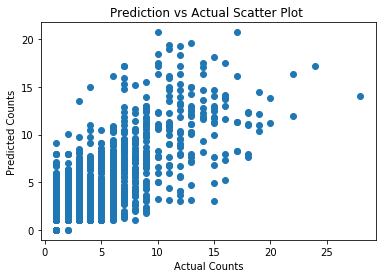

In [93]:
plt.scatter(test["count"],test["predict"])
plt.xlabel("Actual Counts")
plt.ylabel("Predicted Counts")
plt.title("Prediction vs Actual Scatter Plot ")

### Model Validation using R-squared error

In [94]:
from sklearn.metrics import r2_score
r2_score(test["count"], test["predict"])  

0.56614230594563542

In [96]:
r2_score(validation_data["count"], validation_data["predict"])  

0.69892129437766171

#### Plotting the test datset on the road network to see the prediction on the grid.


In [226]:
gridsLayer["ID"] = gridsLayer["ID"].astype(int)
gd = pd.merge(validation_data,gridsLayer, how='inner', on=['ID'])
#grid_9_12_2016.fillna(0)
#hour_Afternoon',
#u'hour_Evening',
#u'hour_Morning',
#u'hour_Night',
gd = gd[gd["hour_Morning"] == 1]
import shapely.wkt
#geometry = gd['geometry'].map(shapely.wkt.loads)
crs = {'init': 'epsg:4326'}
gd = gpd.GeoDataFrame(gd, crs=crs, geometry="geometry")

shapefilepath = "./data/RoadNetwork/Maryland_Annual_Average_Daily_Traffic__Annual_Average_Daily_Traffic_SHA_Statewide_AADT_Lines.shp"
roadnetworkwithbuffer = gpd.read_file(shapefilepath)

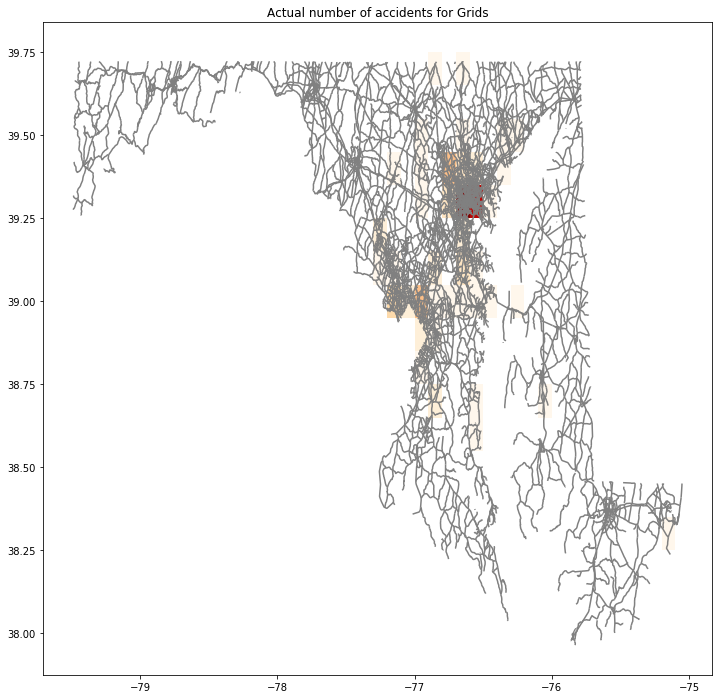

In [230]:
import geopandas as gpd
f, ax = plt.subplots(1, figsize=(12, 12))

base = roadnetworkwithbuffer.plot(axes=ax, color='grey');
gd.plot(axes=base,column='count', cmap='OrRd')
plt.title("Actual number of accidents for Grids")
plt.show()

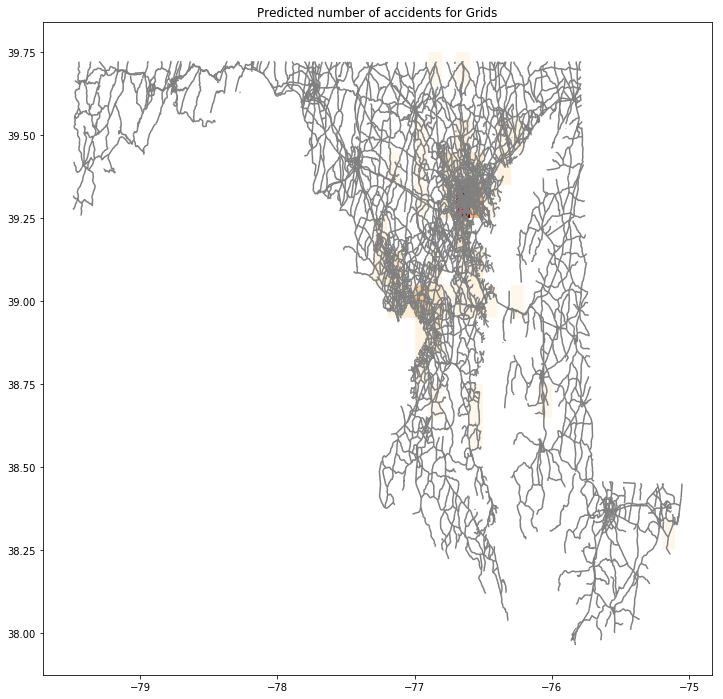

In [229]:
import geopandas as gpd
f, ax = plt.subplots(1, figsize=(12, 12))

base = roadnetworkwithbuffer.plot(axes=ax, color='grey');
gd.plot(axes=base,column='predict', cmap='OrRd')
plt.title("Predicted number of accidents for Grids")
plt.show()